# Object detection with Detecto/PyTorch

Date: 2021/8/29

In [1]:
import cv2 as cv
from detecto.core import Model
import matplotlib.pyplot as plt
import time

%matplotlib inline

In [2]:
FILENAME = 'model_weights.pth'
LABELS = ['outlet', 'mouth', 'earth terminal']
saved_model = Model.load(FILENAME, LABELS)

In [11]:
def _infer(img, threshold):
    results = saved_model.predict(img)
    
    for i in range(len(results[0])):
        label = results[0][i]
        rect = results[1][i]
        acc = results[2][i]
        if acc > threshold:
            cv.rectangle(img, (rect[0], rect[1]), (rect[2], rect[3]), (255, 0, 0), 1)
            cv.putText(img, "{} {:.2f}".format(label, acc), (rect[0], rect[1]-5), cv.FONT_HERSHEY_PLAIN, fontScale=1.0, color=(0, 0, 255), lineType=cv.LINE_AA)
            
def infer(filename, threshold, show_elapsed_time=False):
    t0 = time.time()
    mat = cv.imread(filename)
    resized = cv.resize(mat, (int(mat.shape[1]/2), int(mat.shape[0]/2)))
    _infer(resized, threshold)
    t1 = time.time()
    print('Elapsed time: {:.1f} sec'.format(t1 - t0))
    
    img = cv.cvtColor(resized, cv.COLOR_BGR2RGB)
    fig = plt.figure(1, (10., 10.))
    plt.imshow(img)

Elapsed time: 8.6 sec


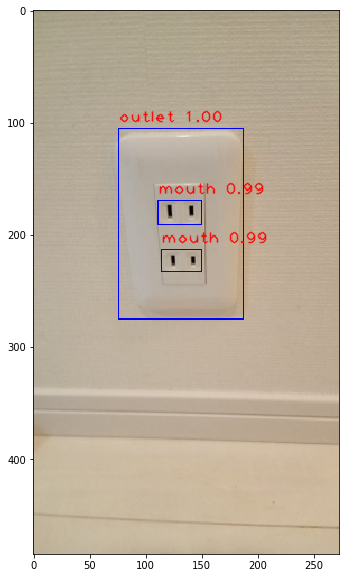

In [12]:
infer('sample1.jpg', 0.8)

Elapsed time: 8.7 sec


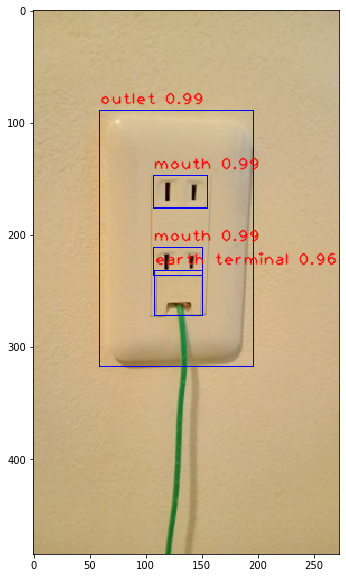

In [13]:
infer('sample2.jpg', 0.8)